In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import random

In [2]:
ed_exp = pd.read_csv("Resources/government-expenditure-on-education.csv")
ed_grad = pd.read_csv('Resources/EAG_GRAD_ENTR_RATES_06022021014126375.csv')
crm_pers_held = pd.read_csv('Resources/crime_persons_held.csv')
crm_enter = pd.read_csv('Resources/crime_entering_prison.csv')

In [3]:
recent_ed_exp=ed_exp.loc[ed_exp["Year"]>=2012]
recent_ed_exp

,Entity,Code,Year,"Government expenditure on education, total (% of GDP)"
10,Afghanistan,AFG,2012,2.52441
11,Afghanistan,AFG,2013,3.47171
12,Afghanistan,AFG,2014,3.77759
13,Afghanistan,AFG,2015,3.24202
28,Albania,ALB,2013,3.53930
...,...,...,...,...
3562,Vietnam,VNM,2012,5.53329
3563,Vietnam,VNM,2013,5.65200
3610,Zimbabwe,ZWE,2012,7.29443
3611,Zimbabwe,ZWE,2013,7.40817


In [4]:
recent_ed_exp=recent_ed_exp.drop('Code', axis=1)
recent_ed_exp

,Entity,Year,"Government expenditure on education, total (% of GDP)"
10,Afghanistan,2012,2.52441
11,Afghanistan,2013,3.47171
12,Afghanistan,2014,3.77759
13,Afghanistan,2015,3.24202
28,Albania,2013,3.53930
...,...,...,...
3562,Vietnam,2012,5.53329
3563,Vietnam,2013,5.65200
3610,Zimbabwe,2012,7.29443
3611,Zimbabwe,2013,7.40817


In [5]:
ed_exp_mean=recent_ed_exp.groupby("Entity")["Government expenditure on education, total (% of GDP)"].mean()

In [6]:
ed_exp_mean=ed_exp_mean.reset_index()
ed_exp_mean

,Entity,"Government expenditure on education, total (% of GDP)"
0,Afghanistan,3.253932
1,Albania,3.496470
2,Andorra,2.991917
3,Argentina,5.504788
4,Armenia,2.645420
...,...,...
143,United Kingdom,5.647870
144,United States,5.042710
145,Vanuatu,5.230350
146,Vietnam,5.592645


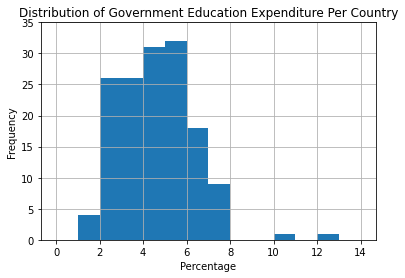

In [7]:
ed_exp_mean['Government expenditure on education, total (% of GDP)'].plot(kind='hist',bins=list(range(15)))
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Government Education Expenditure Per Country')
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35])
plt.savefig('Output/histogram_government_edu_exp.png')
plt.grid()
#try to border bars

In [8]:
top_exp = ed_exp_mean.sort_values(by='Government expenditure on education, total (% of GDP)',ascending=False)
top_20=top_exp.head(20)
top_20
top_20=top_20.set_index('Entity')
top_20

,"Government expenditure on education, total (% of GDP)"
Entity,
Micronesia (country),12.459500
Grenada,10.293130
Iceland,7.812940
Denmark,7.789033
Sweden,7.685060
Moldova,7.506797
Norway,7.506583
Zimbabwe,7.411093
Malta,7.217503


In [9]:
bottom_exp = ed_exp_mean.sort_values(by='Government expenditure on education, total (% of GDP)')
bottom_20=bottom_exp.head(20)
bottom_20=bottom_20.set_index('Entity')
bottom_20

,"Government expenditure on education, total (% of GDP)"
Entity,
Monaco,1.376853
South Sudan,1.560855
Bermuda,1.654863
Cambodia,1.828213
Guinea-Bissau,2.066775
Sri Lanka,2.154724
Myanmar,2.165700
Bangladesh,2.213993
Democratic Republic of Congo,2.267855


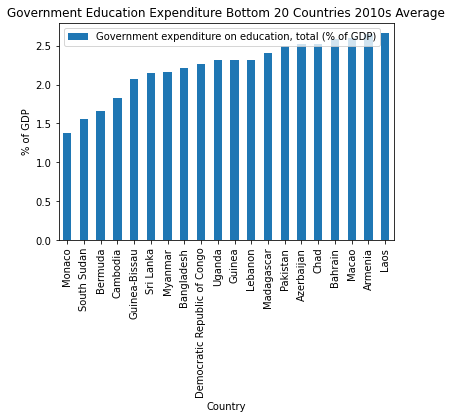

In [10]:
bottom_20.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('% of GDP')
plt.title('Government Education Expenditure Bottom 20 Countries 2010s Average')
plt.savefig("Output/bottom_20_expenditure.png")

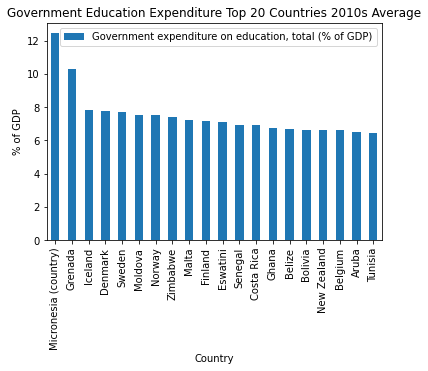

In [11]:
top_20.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('% of GDP')
plt.title('Government Education Expenditure Top 20 Countries 2010s Average')
plt.savefig("Output/top_20_expenditure.png")

In [12]:
ed_grad=ed_grad.drop(['COUNTRY', 'SEX','AGE', 'COUNTRY_ORIGIN', 'International students exclusion', 'ISC11_LEVEL_CAT', 'INDICATOR', 'Indicator', 'YEAR', 'Flag Codes','Flags'], axis=1)

In [13]:
ed_grad=ed_grad.loc[ed_grad['Year']>=2012]
ed_grad

,Country,Gender,Age,Education level and programe orientation,Year,Value
3,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2012,48.375
4,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2013,52.810
5,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2014,54.062
6,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2015,54.794
7,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2016,59.266
...,...,...,...,...,...,...
23421,Saudi Arabia,Women,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2012,NaN
23422,Saudi Arabia,Women,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2013,NaN
23423,Saudi Arabia,Women,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2014,NaN
23424,Saudi Arabia,Women,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2015,NaN


In [14]:
clean_ed_grad=ed_grad.dropna()
clean_ed_grad

,Country,Gender,Age,Education level and programe orientation,Year,Value
3,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2012,48.375
4,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2013,52.810
5,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2014,54.062
6,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2015,54.794
7,Denmark,Total,Less than 30,Total tertiary education (ISCED2011 levels 5 t...,2016,59.266
...,...,...,...,...,...,...
23413,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2014,7.714
23414,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2015,8.439
23415,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2016,9.008
23416,Denmark,Men,Less than 30,Short-cycle tertiary education (ISCED2011 leve...,2017,8.883


In [15]:
new_ed_grad=clean_ed_grad.loc[clean_ed_grad['Gender']=='Total']
new_ed_grad=new_ed_grad.loc[new_ed_grad['Age']=='Total: All age groups']
new_ed_grad

,Country,Gender,Age,Education level and programe orientation,Year,Value
35,Spain,Total,Total: All age groups,Short-cycle tertiary education (ISCED2011 leve...,2016,21.598
108,Poland,Total,Total: All age groups,Short-cycle tertiary education (ISCED2011 leve...,2015,0.121
109,Poland,Total,Total: All age groups,Short-cycle tertiary education (ISCED2011 leve...,2016,0.032
379,Germany,Total,Total: All age groups,Doctoral or equivalent level (ISCED2011 level 8),2013,2.363
380,Germany,Total,Total: All age groups,Doctoral or equivalent level (ISCED2011 level 8),2014,2.354
...,...,...,...,...,...,...
23240,Switzerland,Total,Total: All age groups,Total tertiary education (ISCED2011 levels 5 t...,2014,46.264
23241,Switzerland,Total,Total: All age groups,Total tertiary education (ISCED2011 levels 5 t...,2015,45.177
23242,Switzerland,Total,Total: All age groups,Total tertiary education (ISCED2011 levels 5 t...,2016,44.233
23256,Indonesia,Total,Total: All age groups,Master’s or equivalent level (ISCED2011 level 7),2015,1.465


In [16]:
new=new_ed_grad.rename(columns={'Education level and programe orientation ':'Education Level'})
new

,Country,Gender,Age,Education Level,Year,Value
35,Spain,Total,Total: All age groups,Short-cycle tertiary education (ISCED2011 leve...,2016,21.598
108,Poland,Total,Total: All age groups,Short-cycle tertiary education (ISCED2011 leve...,2015,0.121
109,Poland,Total,Total: All age groups,Short-cycle tertiary education (ISCED2011 leve...,2016,0.032
379,Germany,Total,Total: All age groups,Doctoral or equivalent level (ISCED2011 level 8),2013,2.363
380,Germany,Total,Total: All age groups,Doctoral or equivalent level (ISCED2011 level 8),2014,2.354
...,...,...,...,...,...,...
23240,Switzerland,Total,Total: All age groups,Total tertiary education (ISCED2011 levels 5 t...,2014,46.264
23241,Switzerland,Total,Total: All age groups,Total tertiary education (ISCED2011 levels 5 t...,2015,45.177
23242,Switzerland,Total,Total: All age groups,Total tertiary education (ISCED2011 levels 5 t...,2016,44.233
23256,Indonesia,Total,Total: All age groups,Master’s or equivalent level (ISCED2011 level 7),2015,1.465


In [17]:
bach_ed=new.loc[new['Education Level']=='Bachelor’s or equivalent level (ISCED2011 level 6)']
bach_ed=bach_ed.groupby('Country')['Value'].mean()
bach_ed=bach_ed.reset_index()
bach_ed=bach_ed.set_index('Country')
bach_ed

,Value
Country,
Australia,42.69060
Austria,20.50000
Belgium,39.36625
Canada,34.32380
Chile,35.86500
China (People's Republic of),21.16650
Czech Republic,35.07125
Denmark,48.57120
Finland,44.63660


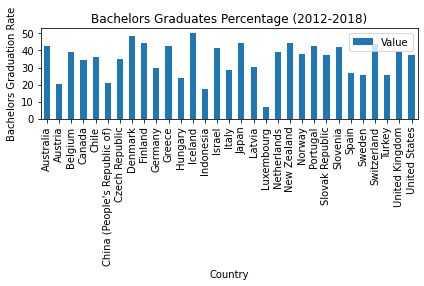

In [18]:
bach_ed.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xlabel('Country')
plt.ylabel('Bachelors Graduation Rate')
plt.title('Bachelors Graduates Percentage (2012-2018)')
plt.tight_layout()
plt.savefig("Output/bachelors_grad.png")

In [19]:
master_ed=new.loc[new['Education Level']=='Master’s or equivalent level (ISCED2011 level 7)']
master_ed=master_ed.groupby('Country')['Value'].mean()
master_ed=master_ed.reset_index()
master_ed=master_ed.set_index('Country')
master_ed

,Value
Country,
Australia,8.173600
Austria,16.459200
Belgium,11.613000
Canada,9.474400
Chile,10.110000
China (People's Republic of),2.137500
Czech Republic,23.007000
Denmark,23.142800
Finland,20.908800


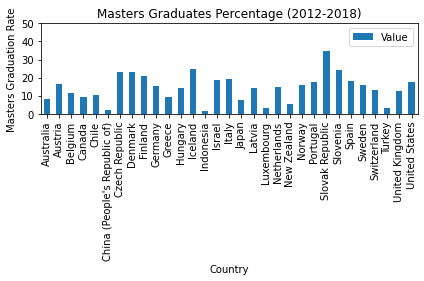

In [20]:
master_ed.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xlabel('Country')
plt.ylabel('Masters Graduation Rate')
plt.title('Masters Graduates Percentage (2012-2018)')
plt.tight_layout()
plt.savefig("Output/masters_grad.png")

In [21]:
doc_ed=new.loc[new['Education Level']=='Doctoral or equivalent level  (ISCED2011 level 8)']
doc_ed=doc_ed.groupby('Country')['Value'].mean()
doc_ed=doc_ed.reset_index()
doc_ed=doc_ed.set_index('Country')
doc_ed

,Value
Country,
Australia,1.535800
Austria,1.345200
Belgium,0.330000
Canada,1.163800
Chile,0.257000
China (People's Republic of),0.220000
Czech Republic,1.360000
Denmark,2.000200
Finland,1.957200


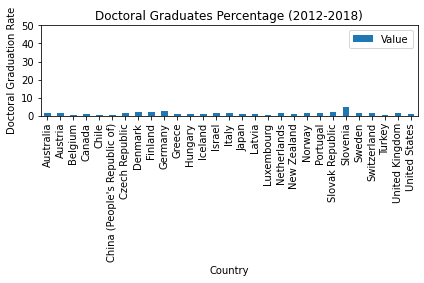

In [22]:
doc_ed.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xlabel('Country')
plt.ylabel('Doctoral Graduation Rate')
plt.title('Doctoral Graduates Percentage (2012-2018)')
plt.tight_layout()
plt.savefig("Output/doctoral_grad.png")

In [23]:
high_school=ed_grad.loc[ed_grad['Education level and programe orientation ']=='Upper secondary general education (ISCED2011 level 3 programme 4)']
high_school

,Country,Gender,Age,Education level and programe orientation,Year,Value
409,Luxembourg,Men,Less than 25,Upper secondary general education (ISCED2011 l...,2016,30.174
410,Luxembourg,Men,Less than 25,Upper secondary general education (ISCED2011 l...,2017,30.019
411,Luxembourg,Men,Less than 25,Upper secondary general education (ISCED2011 l...,2018,29.430
547,Slovenia,Men,Less than 25,Upper secondary general education (ISCED2011 l...,2016,27.452
548,Slovenia,Men,Less than 25,Upper secondary general education (ISCED2011 l...,2017,24.706
...,...,...,...,...,...,...
23269,Brazil,Men,Less than 25,Upper secondary general education (ISCED2011 l...,2017,50.734
23270,Brazil,Men,Less than 25,Upper secondary general education (ISCED2011 l...,2018,52.166
23378,Iceland,Women,Less than 25,Upper secondary general education (ISCED2011 l...,2016,67.553
23379,Iceland,Women,Less than 25,Upper secondary general education (ISCED2011 l...,2017,70.110


In [24]:
high_school=high_school.dropna()
high_school

,Country,Gender,Age,Education level and programe orientation,Year,Value
409,Luxembourg,Men,Less than 25,Upper secondary general education (ISCED2011 l...,2016,30.174
410,Luxembourg,Men,Less than 25,Upper secondary general education (ISCED2011 l...,2017,30.019
411,Luxembourg,Men,Less than 25,Upper secondary general education (ISCED2011 l...,2018,29.430
547,Slovenia,Men,Less than 25,Upper secondary general education (ISCED2011 l...,2016,27.452
548,Slovenia,Men,Less than 25,Upper secondary general education (ISCED2011 l...,2017,24.706
...,...,...,...,...,...,...
23269,Brazil,Men,Less than 25,Upper secondary general education (ISCED2011 l...,2017,50.734
23270,Brazil,Men,Less than 25,Upper secondary general education (ISCED2011 l...,2018,52.166
23378,Iceland,Women,Less than 25,Upper secondary general education (ISCED2011 l...,2016,67.553
23379,Iceland,Women,Less than 25,Upper secondary general education (ISCED2011 l...,2017,70.110


In [25]:
high_school=high_school.groupby('Country')['Value'].mean()
high_school=high_school.reset_index()
high_school

,Country,Value
0,Austria,19.948000
1,Belgium,17.720333
2,Brazil,56.155000
3,Canada,83.395778
4,Chile,59.851111
5,Colombia,53.298556
6,Costa Rica,28.174222
7,Czech Republic,25.308111
8,Denmark,66.098667
9,Estonia,60.284333


In [26]:
high_school_ed=high_school.set_index('Country')
high_school_ed

,Value
Country,
Austria,19.948000
Belgium,17.720333
Brazil,56.155000
Canada,83.395778
Chile,59.851111
Colombia,53.298556
Costa Rica,28.174222
Czech Republic,25.308111
Denmark,66.098667


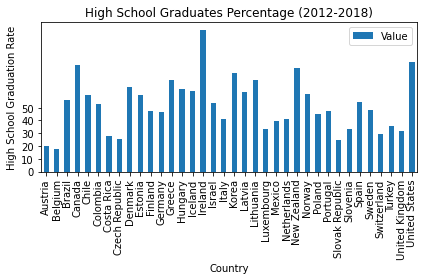

In [27]:
high_school_ed.plot(kind='bar')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.xlabel('Country')
plt.ylabel('High School Graduation Rate')
plt.title('High School Graduates Percentage (2012-2018)')
plt.tight_layout()
plt.savefig("Output/high_school_grad.png")

In [28]:
crm_pers_held

,Region,Subregion,Country,Source,Year,count,rate
0,Asia,Southern Asia,Afghanistan,WPB-ICPR,2003,NaN,NaN
1,Europe,Southern Europe,Albania,UN-CTS,2003,2561.0,82.135985
2,Africa,Northern Africa,Algeria,UN-CTS/WPB-ICPR,2003,39806.0,123.375899
3,Oceania,Polynesia,American Samoa,WPB-ICPR,2003,NaN,NaN
4,Europe,Southern Europe,Andorra,UN-CTS/WPB-ICPR,2003,61.0,83.561644
...,...,...,...,...,...,...,...
3595,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2014,11769.0,104.883700
3596,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2015,10994.0,97.395464
3597,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2016,11071.0,97.507486
3598,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2017,10073.0,88.204904


In [29]:
crm_pers_held=crm_pers_held.dropna()
crm_pers_held=crm_pers_held.loc[crm_pers_held["Year"]>=2012]
crm_pers_held

,Region,Subregion,Country,Source,Year,count,rate
1010,Africa,Eastern Africa,Uganda,UN-CTS,2012,35212.0,101.889522
1011,Africa,Northern Africa,Morocco,UN-CTS,2012,70675.0,212.607545
1012,Africa,Eastern Africa,Uganda,UN-CTS,2013,39568.0,110.850259
1013,Africa,Northern Africa,Morocco,UN-CTS,2013,72000.0,213.548464
1014,Africa,Eastern Africa,Uganda,UN-CTS,2014,42330.0,114.678153
...,...,...,...,...,...,...,...
3595,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2014,11769.0,104.883700
3596,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2015,10994.0,97.395464
3597,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2016,11071.0,97.507486
3598,Europe,Western Europe,Belgium,WPB-ICPR/UN-CTS,2017,10073.0,88.204904


In [30]:
crm_pers_held=crm_pers_held.drop(['Region','Subregion','Source'], axis=1)
crm_pers_held

,Country,Year,count,rate
1010,Uganda,2012,35212.0,101.889522
1011,Morocco,2012,70675.0,212.607545
1012,Uganda,2013,39568.0,110.850259
1013,Morocco,2013,72000.0,213.548464
1014,Uganda,2014,42330.0,114.678153
...,...,...,...,...
3595,Belgium,2014,11769.0,104.883700
3596,Belgium,2015,10994.0,97.395464
3597,Belgium,2016,11071.0,97.507486
3598,Belgium,2017,10073.0,88.204904


In [31]:
df_rate=crm_pers_held.groupby('Country')['rate'].mean()
df_rate=df_rate.reset_index()
df_rate=df_rate.set_index('Country')
df_rate.sort_values(by='rate',ascending=False)

,rate
Country,
United States of America,687.318718
Belize,585.390895
Seychelles,580.884509
Saint Kitts and Nevis,578.611161
Turkmenistan,549.262508
...,...
State of Palestine,22.927270
Comoros,22.548448
Faeroe Islands,18.402778


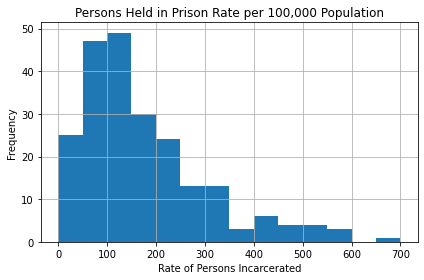

In [32]:
bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]
df_rate['rate'].plot(kind='hist', bins=bins)
plt.xlabel('Rate of Persons Incarcerated')
plt.ylabel('Frequency')
plt.title('Persons Held in Prison Rate per 100,000 Population')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.tight_layout()
plt.grid()
plt.show
plt.savefig('Output/histogram_persons_imprisoned.png')
#separate bars (if possible)

In [33]:
crm_enter=crm_enter.loc[crm_enter['Indicator']=='Total number of persons entering prisons']
crm_enter=crm_enter.drop(['Region','Sub-region'],axis=1)

In [34]:
crm_enter=crm_enter.groupby('Country')['Count'].mean()
crm_enter.reset_index()

,Country,Count
0,Albania,5887.250000
1,Algeria,48916.666667
2,Andorra,75.666667
3,Argentina,80165.333333
4,Australia,65025.000000
...,...,...
86,United Arab Emirates,117208.666667
87,United Kingdom (England and Wales),101644.000000
88,United Kingdom (Northern Ireland),3705.000000
89,United Kingdom (Scotland),33731.500000


In [37]:
merge1=pd.concat([high_school_ed, bach_ed, master_ed, doc_ed, df_rate, crm_enter], axis=1)
merge1.columns=['High School', 'Bachelors', 'Masters', 'Doctoral', 'Incarceration Rate', 'Prison Entering Rate']
merge1

,High School,Bachelors,Masters,Doctoral,Incarceration Rate,Prison Entering Rate
Austria,19.948000,20.50000,16.4592,1.3452,101.665470,11582.0
Belgium,17.720333,39.36625,11.6130,0.3300,97.940033,18731.5
Brazil,56.155000,NaN,NaN,NaN,323.257213,217866.5
Canada,83.395778,34.32380,9.4744,1.1638,111.994161,56713.2
Chile,59.851111,35.86500,10.1100,0.2570,272.217493,88672.0
...,...,...,...,...,...,...
Viet Nam,NaN,NaN,NaN,NaN,144.894522,NaN
Yemen,NaN,NaN,NaN,NaN,54.943940,NaN
Zambia,NaN,NaN,NaN,NaN,120.719034,NaN
Zimbabwe,NaN,NaN,NaN,NaN,131.551955,NaN


In [43]:
top10_inc=merge1.sort_values(by='Incarceration Rate', ascending=False)
top10_inc=top20_inc.head(10)
top10_inc

,High School,Bachelors,Masters,Doctoral,Incarceration Rate,Prison Entering Rate
United States of America,NaN,NaN,NaN,NaN,687.318718,618210.500000
Belize,NaN,NaN,NaN,NaN,585.390895,2594.666667
Seychelles,NaN,NaN,NaN,NaN,580.884509,NaN
Saint Kitts and Nevis,NaN,NaN,NaN,NaN,578.611161,NaN
Turkmenistan,NaN,NaN,NaN,NaN,549.262508,NaN
United States Virgin Islands,NaN,NaN,NaN,NaN,546.931716,NaN
El Salvador,NaN,NaN,NaN,NaN,524.030888,7979.333333
Cuba,NaN,NaN,NaN,NaN,509.345296,NaN
Rwanda,NaN,NaN,NaN,NaN,499.333523,NaN
British Virgin Islands,NaN,NaN,NaN,NaN,468.965517,NaN


In [ ]:
# x_values=merge1['High School']
# y_values=merge1['Incarceration Rate']
# plt.scatter(x_values,y_values,edgecolor='black')
# plt.title('City Latitude vs. Max Temperature (2/4/21)')
# plt.xlabel('Latitude')
# plt.ylabel('Max Tempersture (F)')
# plt.grid()
# plt.savefig('output_data/lat_vs_temp.png')